<a href="https://colab.research.google.com/github/michele25-10/Python/blob/main/lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_breast_cancer

In [2]:
X, y = load_breast_cancer(return_X_y=True)

In [3]:
X.shape

(569, 30)

In [6]:
tf.keras.backend.clear_session() #resetta tutti i grafi che tensorflow ha generato precedentemente
tf.random.set_seed(10)  #setto il seed randomico cosicchè l'esperimento sia riproducibile
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=[30]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.save_weights('init.weights.h5')

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_model_loss(model, X, y, batch_size, epochs):

    class LossHistory(tf.keras.callbacks.Callback):
        def on_train_begin(self, logs=None):
            self.losses = []

        def on_batch_end(self, batch, logs=None):
            self.losses.append(logs.get('loss'))

        def on_train_end(self, logs=None):
            self.model.history.history['batch_loss'] = self.losses

    # Inizializzare il callback
    loss_history = LossHistory()

    # Eseguire l'addestramento del modello con il callback
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        shuffle=True,
                        callbacks=[loss_history])

    # Tracciare la perdita
    fig = plt.figure(figsize=(10,5))
    to_plot = 'loss' if batch_size >= X.shape[0] else 'batch_loss'
    plt.plot(range(len(history.history[to_plot])), history.history[to_plot])
    plt.title(label=f'Batch size: {batch_size}')
    plt.grid(True)
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.show()

    return history


In [20]:
X.shape

(569, 30)

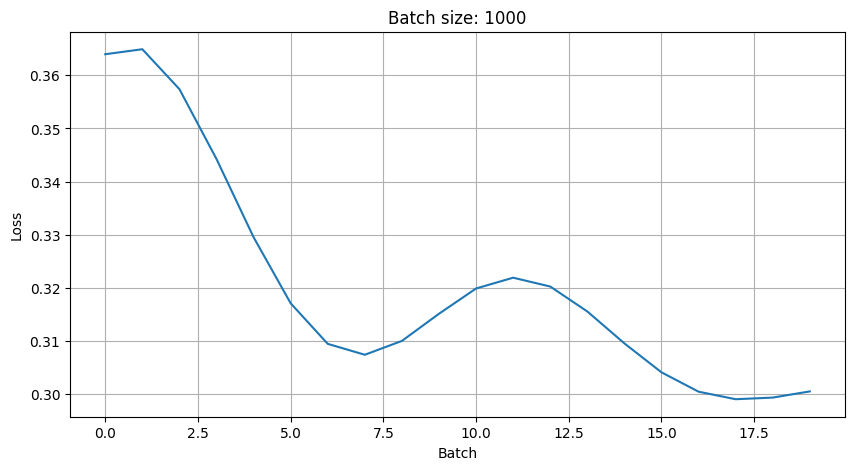

CPU times: user 964 ms, sys: 126 ms, total: 1.09 s
Wall time: 1.37 s


In [36]:
%%time
h = plot_model_loss(model, X, y, 1000, 20)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


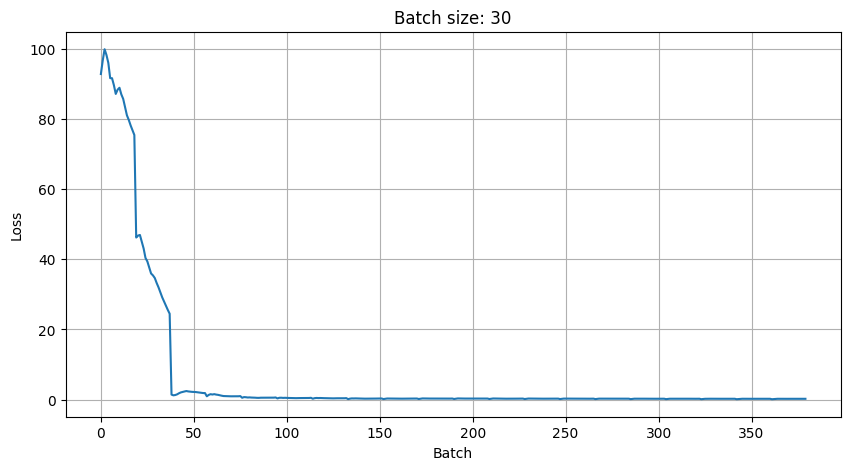

CPU times: user 1.41 s, sys: 145 ms, total: 1.55 s
Wall time: 1.42 s


In [37]:
%%time
model.load_weights('init.weights.h5')
h = plot_model_loss(model, X, y, 30, 20)

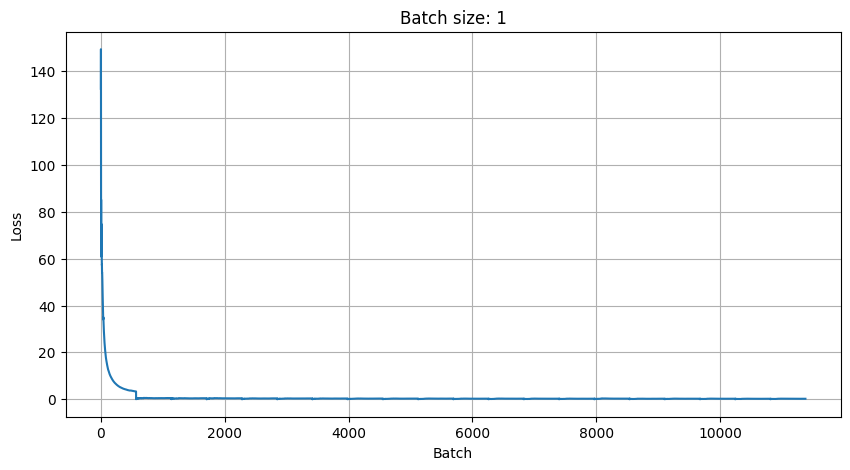

CPU times: user 18.6 s, sys: 1.03 s, total: 19.6 s
Wall time: 23.9 s


In [38]:
%%time
model.load_weights('init.weights.h5')
h = plot_model_loss(model, X, y, 1, 20)